##### In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
#### To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

#### The Below Analysis is done to predict the High value and avoid the Churn of High Value Customers

### Importing all the required Lib for analysis

In [184]:
###Importing all the required libraries for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Creating Pipeline 

# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
### import all the required packages
import numpy as np
import pandas as pd

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
#Visaulize
import matplotlib.pyplot as plt
import seaborn as sns


# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve

from sklearn.preprocessing import MinMaxScaler


## importing the confusion matrix

from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Suppressing Warnings
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

In [3]:
### Load the data set and do the analysis
input_file = pd.read_csv('telecom_churn_data.csv')

### Analysing the Metadata of the data for the data types and null values

In [4]:
## Describing the Dataframe information 

input_file.info( verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [5]:
## Sampiling couple of records

input_file.head(2)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362

### predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months

In [6]:
### Get only the high vlaue customersA

input_file['Avg'] =(input_file.total_rech_amt_6 + input_file.total_rech_amt_7)/2

### We are computing the average of total recharge for 6 and 7 months  and 70 percentile of the average

In [7]:
input_file[['total_rech_amt_6','total_rech_amt_7','Avg']].describe([0.1 ,0.2, 0.5, 0.7])

,total_rech_amt_6,total_rech_amt_7,Avg
count,99999.000000,99999.000000,99999.000000
mean,327.514615,322.962970,325.238792
std,398.019701,408.114237,370.833466
min,0.000000,0.000000,0.000000
10%,0.000000,0.000000,60.000000
20%,80.000000,65.000000,99.500000
50%,230.000000,220.000000,229.000000
70%,378.000000,370.000000,368.500000
max,35190.000000,40335.000000,37762.500000


In [8]:
input_HVC=input_file[input_file.Avg > 368.500000]

In [9]:
## Count of the high vlaue customers is 29.9K wich is matching as expected

input_HVC.mobile_number.count()

29979

In [10]:
### Tag Churners and remove the attributes of the Churn phase
input_HVC[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head(20)

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
7,0.00,0.00,0.00,0.00
8,34.91,142.18,0.00,0.00
13,631.86,446.09,0.00,0.00
16,334.56,255.74,0.00,0.00
17,87.13,631.08,0.00,0.00
21,252.61,1031.53,0.00,0.00
24,330.03,627.78,0.00,0.00
33,114.16,1.70,30.92,5588.11
38,114.09,708.04,0.00,0.00
41,165.84,89.13,0.00,0.00


In [11]:
input_HVC[((input_HVC.total_ic_mou_9 == 0)&
          (input_HVC.total_og_mou_9 == 0)) & ((input_HVC.vol_2g_mb_9 == 0)& (input_HVC.vol_3g_mb_9 == 0))
         ][['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].count()

total_ic_mou_9    2589
total_og_mou_9    2589
vol_2g_mb_9       2589
vol_3g_mb_9       2589
dtype: int64

### Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. 

In [12]:
input_HVC['Churn']=input_HVC.apply(lambda x : (1 if (((x.total_ic_mou_9 == 0)|
          (x.total_og_mou_9 == 0)) & ((x.vol_2g_mb_9 == 0)& (x.vol_3g_mb_9 == 0))) else 0),axis=1)

### 1 - Chrun 0- No chrun 

In [13]:
input_HVC.groupby('Churn')['Churn'].count()

Churn
0    27089
1     2890
Name: Churn, dtype: int64

### We could observe that 9.6% of the High value customers have Churned.

In [186]:
churn = (sum(input_HVC['Churn'])/len(input_HVC['Churn'].index))*100
print(churn)

9.640081390306548


## Conduct appropriate exploratory analysis to extract useful insights

In [187]:
input_HVC.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 228 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

Text(0.5, 0, 'Chrun')

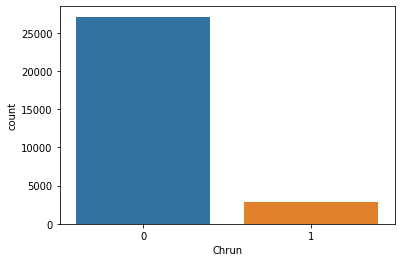

In [14]:
sns.countplot(x='Churn',data=input_HVC,label="Churn")
plt.xlabel('Chrun')

## Removing the 9th month columns from the list for our predictions

In [16]:
input_HVC.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'fb_user_7', 'fb_user_8', 'fb_user_9', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'Avg', 'Churn'],
      dtype='object', length=228)

In [17]:
col_list=input_HVC.columns

In [18]:
col_list_n9=[]
for i in col_list:
    if '9' not in i.split("_"):
        col_list_n9.append(i)

### Data excluding all the last month KPI's for the dataset and creating a new Data set

In [21]:
input_HVC_Raw=input_HVC[col_list_n9]

#### Analysig the column which has No variance and removing fromt the dataset at it does not contribute to the Dimensionality reduction

In [23]:
input_HVC_Raw.describe(exclude='number')

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
count,29979,29948,29822,29917,29865,29385,11387,11652,11741
unique,1,1,1,30,31,31,30,31,31
top,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/31/2014,8/31/2014
freq,29979,29948,29822,8715,7920,6665,927,891,1004


## Droping these data columns in the table which have no variance

In [24]:

cols=input_HVC_Raw.describe(exclude='number').columns

In [25]:
input_HVC_Raw=input_HVC_Raw.drop(cols,axis=1)

In [26]:
# removing the columns which has no variance

cols_novar=input_HVC_Raw.std()[input_HVC_Raw.std() == 0].index.values

In [27]:

input_HVC_Raw=input_HVC_Raw.drop(cols_novar,axis=1)

In [28]:
input_HVC_Raw.shape

(29979, 155)

### Now we are imputing the missing values for flags impute with -1 and for continous variable impute with 0, we could notice that for the columns which hold the minute and amount data, we can impute we 0 as it implies either no call incoming or outgoing or no recharge was made

In [202]:
input_HVC_Raw.describe([0.1 ,0.2, 0.5, 0.7,0.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Avg,Churn
count,2.997900e+04,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.

## Setting up '0' for NaN for Numeric/Continuos value

In [41]:
## Setting up '0' for NaN for Numeric/Continuos value

round(100*(input_HVC_Raw.isnull().sum()/len(input_HVC_Raw.index)), 2).sort_values(ascending=True)


mobile_number         0.0
max_rech_amt_8        0.0
last_day_rch_amt_6    0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_8    0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
count_rech_2g_6       0.0
count_rech_2g_7       0.0
count_rech_2g_8       0.0
count_rech_3g_6       0.0
count_rech_3g_7       0.0
max_rech_amt_7        0.0
max_rech_amt_6        0.0
total_rech_amt_8      0.0
total_rech_amt_7      0.0
total_ic_mou_6        0.0
total_ic_mou_7        0.0
total_ic_mou_8        0.0
spl_ic_mou_6          0.0
spl_ic_mou_7          0.0
spl_ic_mou_8          0.0
isd_ic_mou_6          0.0
count_rech_3g_8       0.0
isd_ic_mou_7          0.0
ic_others_6           0.0
ic_others_7           0.0
ic_others_8           0.0
total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_amt_6      0.0
isd_ic_mou_8          0.0
std_ic_mou_8          0.0
av_rech_amt_

# Filling all the nunmeric values having Nan with 0 

# 1) imputing all the minutest columns which is having NAN to 0
# 2) Imputing all the amount columns whihc is having NAN to 0



In [42]:



    
col_list_mou=[]
for i in input_HVC_Raw.columns:
    if 'mou' in i.split("_"):
        col_list_mou.append(i)
for j in col_list_mou:
    input_HVC_Raw[j].fillna(0,inplace = True)
    
        
col_list_others=[]
for i in input_HVC_Raw.columns:
    if 'others' in i.split("_"):
        col_list_others.append(i)

for j in col_list_others:
    input_HVC_Raw[j].fillna(0,inplace = True)
        



In [43]:
input_HVC_Raw['count_rech_3g_8'].fillna(0,inplace = True)
input_HVC_Raw['count_rech_3g_7'].fillna(0,inplace = True)
input_HVC_Raw['count_rech_3g_6'].fillna(0,inplace = True)
input_HVC_Raw['count_rech_2g_8'].fillna(0,inplace = True)
input_HVC_Raw['count_rech_2g_7'].fillna(0,inplace = True)
input_HVC_Raw['count_rech_2g_6'].fillna(0,inplace = True)
input_HVC_Raw['max_rech_data_8'].fillna(0,inplace = True)
input_HVC_Raw['max_rech_data_6'].fillna(0,inplace = True)
input_HVC_Raw['max_rech_data_7'].fillna(0,inplace = True)
input_HVC_Raw['arpu_3g_8'].fillna(0,inplace = True)
input_HVC_Raw['arpu_3g_6'].fillna(0,inplace = True)
input_HVC_Raw['arpu_3g_7'].fillna(0,inplace = True)
input_HVC_Raw['av_rech_amt_data_8'].fillna(0,inplace = True)
input_HVC_Raw['av_rech_amt_data_6'].fillna(0,inplace = True)
input_HVC_Raw['av_rech_amt_data_7'].fillna(0,inplace = True)
input_HVC_Raw['arpu_2g_8'].fillna(0,inplace = True)
input_HVC_Raw['arpu_2g_6'].fillna(0,inplace = True)
input_HVC_Raw['arpu_2g_7'].fillna(0,inplace = True)
input_HVC_Raw['total_rech_data_8'].fillna(0,inplace = True)
input_HVC_Raw['total_rech_data_6'].fillna(0,inplace = True)
input_HVC_Raw['total_rech_data_7'].fillna(0,inplace = True)
input_HVC_Raw['fb_user_8'].fillna(-1,inplace = True)
input_HVC_Raw['fb_user_6'].fillna(-1,inplace = True)
input_HVC_Raw['fb_user_7'].fillna(-1,inplace = True)
input_HVC_Raw['night_pck_user_8'].fillna(-1,inplace = True)
input_HVC_Raw['night_pck_user_7'].fillna(-1,inplace = True)
input_HVC_Raw['night_pck_user_6'].fillna(-1,inplace = True)

In [44]:
input_HVC_Raw.shape

(29979, 155)

In [45]:
from sklearn.model_selection import train_test_split

## We are droping of the columns before we split the test and train dataset

In [89]:
# Putting feature variable to X
X = input_HVC_Raw.drop(['Churn','mobile_number','Avg'],axis=1)

# Putting response variable to y
y = input_HVC_Raw['Churn']
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,0.0,19.83,0.0,0.0,0.0,-1.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,-1.0,1.0,1.0,315,21.03,910.65,122.16,0.0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.0

In [90]:
churn = (sum(input_HVC_Raw['Churn'])/len(input_HVC_Raw['Churn'].index))*100
print(churn)

9.640081390306548


### Splitting the data into train and test , we are taking 70% of the data to train the model and 30% for testing

In [92]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

## Now we are converting all the continous variable to the Standard scaler 

In [93]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler_std = StandardScaler()

In [94]:
cols=X_train.columns

X_train[cols]=scaler_std.fit_transform(X_train[cols])


### Improting the PCA module for peforming the dimension reduction 

In [97]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

### Performing the PCA on the train data

In [98]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

### we now analyse on the PC which is generated, depending on the % of variance that is exaplainable by these components we limit the number of components

In [99]:
pca.components_

array([[ 4.80689526e-02,  5.30581688e-02,  5.55944510e-02, ...,
         1.38700377e-01,  1.33265495e-01,  4.01422759e-02],
       [ 1.35586483e-01,  1.49763368e-01,  1.53218147e-01, ...,
        -3.85040386e-03, -6.58914179e-03,  6.91130368e-03],
       [ 1.27544327e-01,  1.56207823e-01,  1.42443532e-01, ...,
         1.99800451e-02,  1.83486087e-02,  1.09997247e-02],
       ...,
       [-0.00000000e+00, -1.03181270e-16, -1.10020441e-16, ...,
         6.60224138e-17, -6.44530930e-17,  8.94858783e-18],
       [-0.00000000e+00,  5.77933200e-17,  6.90709354e-17, ...,
        -4.77415306e-17,  5.49104228e-17, -2.10999855e-17],
       [ 0.00000000e+00, -2.19762743e-17,  7.43869969e-17, ...,
         5.16113841e-17,  4.92679195e-17, -3.25610560e-17]])

In [100]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.048069,0.135586,arpu_6
1,0.053058,0.149763,arpu_7
2,0.055594,0.153218,arpu_8
3,-0.047511,0.069841,onnet_mou_6
4,-0.048634,0.078016,onnet_mou_7


## Now we are plotting the components to make sure that we dont notice any collinear behaviour

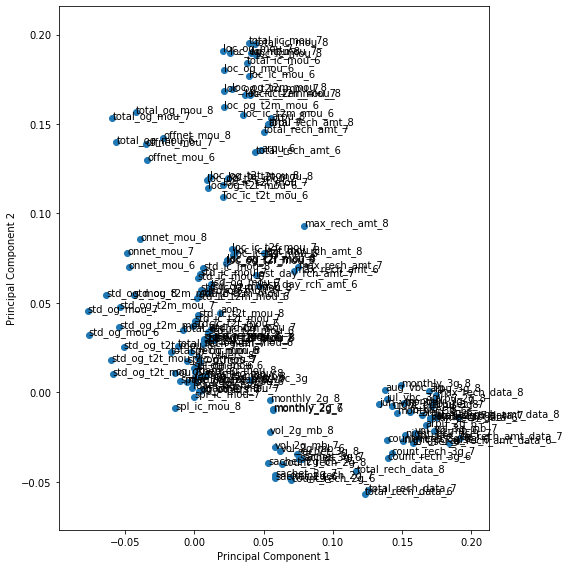

In [101]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

## From the below cumulative plot we notice that the 90% of the variance are explained by around 60% of the components, so we are taking the number of compnents/Featuers to 60

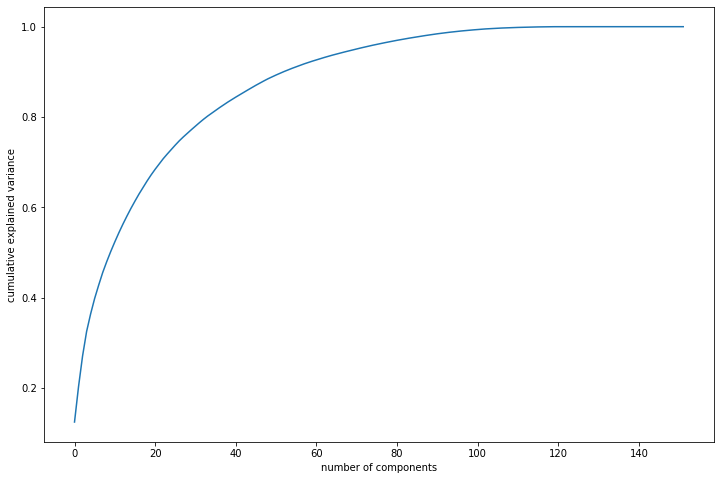

In [102]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### So we are setting the number of components to 60 and performing the PCA again 

In [107]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=60)

In [108]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(20985, 60)

In [109]:
corrmat = np.corrcoef(df_train_pca.transpose())

## The Below correlation matrtix eplains that all the features are not correlated when we transfrom the basis of the features to the new cordinate planes 

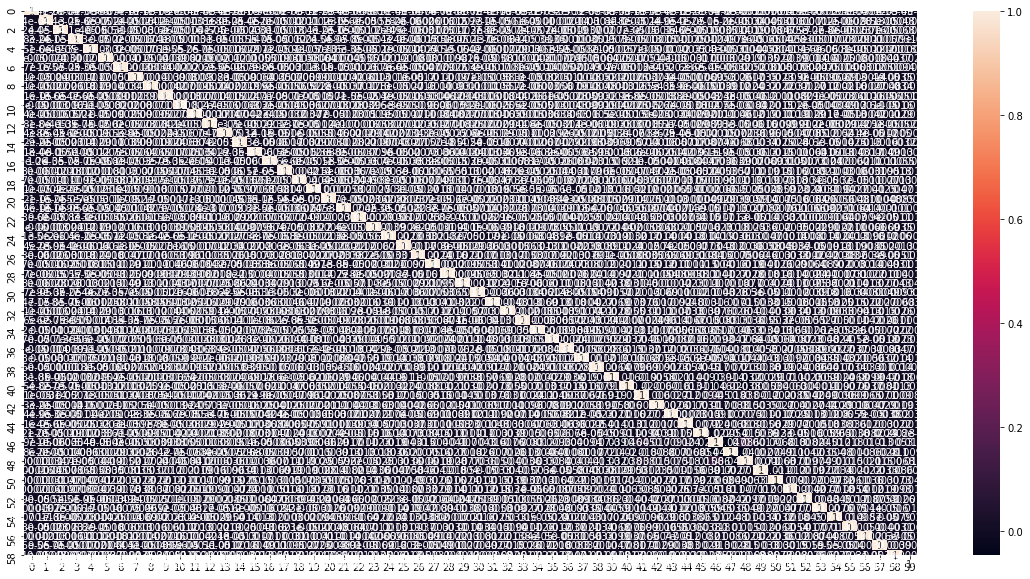

In [110]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [125]:
X_test[cols]=scaler_std.transform(X_test[cols])

In [137]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8994, 60)

### since we are preditcing Categorical variable we are performing the Logistic  regression on the data

In [158]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

from sklearn import metrics

learner_pca = LogisticRegression()

model_pca = learner_pca.fit(df_train_pca,y_train)

In [159]:
#Making prediction on the train data
pred_probs_train = model_pca.predict(df_train_pca)

In [160]:
confusion = metrics.confusion_matrix(y_train, pred_probs_train )
confusion

array([[18687,   303],
       [ 1330,   665]])

## the Model give 92% accuracy score on the test data 

In [173]:
## Training Accuarcy

metrics.accuracy_score(y_train, pred_probs_train)

0.9221825113176079

### Now we are applying the model on the Test data

In [162]:

pred_probs_test = model_pca.predict(df_test_pca)

## The Model give 91% of accuracy on the test data

In [175]:
metrics.accuracy_score(y_test, pred_probs_test)

0.9166110740493663

## Performing k Fold cross validaiton because we have Low percentaage of chrun

In [177]:
from sklearn.model_selection import cross_val_score
reg_kfold=LogisticRegression()
cv_scores = cross_val_score(reg_kfold,df_train_pca,y_train,cv=10,scoring = 'accuracy')

In [179]:
# print 5 accuracies obtained from the 5 folds
print(cv_scores)
print("mean accuracy = {}".format(cv_scores.mean()))

[0.92424964 0.91615055 0.92091472 0.91948547 0.92091472 0.914204
 0.92040038 0.9227836  0.91754051 0.92993327]
mean accuracy = 0.9206576875546982


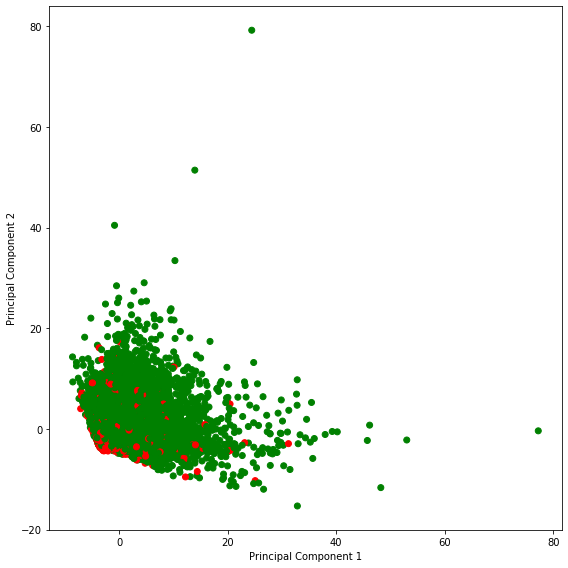

In [181]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()